# Function to quickly show distribution of features in a df

In [1]:
def distributions_of_features(df,target):
    # target feature
    print('-'*30)
    print('Distribution of Target Feature')
    print('-'*30)
    print('COUNTS:')
    print(df[target].value_counts())
    print('- '*15)
    print('PERCENTAGES:')
    class_names = [i for i in pd.DataFrame(df[target].value_counts()).reset_index()['index']]
    percentages = [f'{i*100:.3}%' for i in pd.DataFrame(df[target].value_counts(normalize=True)).reset_index()['target']]
    for value in zip(class_names, percentages):
        print(f'{value[0]}\t   {value[1]}')
    print(f'Name: {target}, dtype: int64') # just for symmetry
    print('-'*30)
    print()
    
    # other features
    show = df.drop(target, axis=1)

    print("-"*30)
    print(f'Distribution of Other Features')
    print("-"*30)
    for column in show.columns:
        print("-"*30)
        print(f"UNIQUE VALUES: {len(show[column].unique())}")
        if len(show[column].unique()) <= 5:
            print("- "*15)
            print(show[column].value_counts())
        else:
            print("- "*15)
            print(f'\t\t  MIN: {show[column].min()}')
            print(f'\t\t  MEAN: {round(show[column].mean())}')
            print(f'\t\t  MAX: {show[column].max()}')
            print((f'Name: {column}, dtype: float64')) 
        print("-"*30)

# Integrating PCA in Pipelines - Lab

## Introduction

In a previous section, you learned about how to use pipelines in scikit-learn to combine several supervised learning algorithms in a manageable pipeline. In this lesson, you will integrate PCA along with classifiers in the pipeline. 

## Objectives

In this lab you will: 

- Integrate PCA in scikit-learn pipelines 

## The Data Science Workflow

You will be following the data science workflow:

1. Initial data inspection, exploratory data analysis, and cleaning
2. Feature engineering and selection
3. Create a baseline model
4. Create a machine learning pipeline and compare results with the baseline model
5. Interpret the model and draw conclusions

##  Initial data inspection, exploratory data analysis, and cleaning

You'll use a dataset created by the Otto group, which was also used in a [Kaggle competition](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). The description of the dataset is as follows:

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are selling millions of products worldwide every day, with several thousand products being added to their product line.

A consistent analysis of the performance of their products is crucial. However, due to their global infrastructure, many identical products get classified differently. Therefore, the quality of product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights the Otto Group can generate about their product range.

In this lab, you'll use a dataset containing:
- A column `id`, which is an anonymous id unique to a product
- 93 columns `feat_1`, `feat_2`, ..., `feat_93`, which are the various features of a product
- a column `target` - the class of a product



The dataset is stored in the `'otto_group.csv'` file. Import this file into a DataFrame called `data`, and then: 

- Check for missing values 
- Check the distribution of columns 
- ... and any other things that come to your mind to explore the data 

## Imports

In [2]:
import pandas as pd



import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '0.9', "grid.color": ".6", "grid.linestyle": ":"})
%matplotlib inline


## Load the data

In [3]:
df = pd.read_csv('otto_group.csv')
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


## Drop Unnecessary `id` Column

In [4]:
df.drop('id', axis=1, inplace=True)

## Identify Target Feature

In [5]:
target = 'target'

## Exploratory Data Analysis Basics

In [6]:
df.shape

(61878, 94)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 94 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feat_1   61878 non-null  int64 
 1   feat_2   61878 non-null  int64 
 2   feat_3   61878 non-null  int64 
 3   feat_4   61878 non-null  int64 
 4   feat_5   61878 non-null  int64 
 5   feat_6   61878 non-null  int64 
 6   feat_7   61878 non-null  int64 
 7   feat_8   61878 non-null  int64 
 8   feat_9   61878 non-null  int64 
 9   feat_10  61878 non-null  int64 
 10  feat_11  61878 non-null  int64 
 11  feat_12  61878 non-null  int64 
 12  feat_13  61878 non-null  int64 
 13  feat_14  61878 non-null  int64 
 14  feat_15  61878 non-null  int64 
 15  feat_16  61878 non-null  int64 
 16  feat_17  61878 non-null  int64 
 17  feat_18  61878 non-null  int64 
 18  feat_19  61878 non-null  int64 
 19  feat_20  61878 non-null  int64 
 20  feat_21  61878 non-null  int64 
 21  feat_22  61878 non-null  int64 
 22

In [8]:
df.isnull().sum().sum()

0

In [9]:
distributions_of_features(df, target)

------------------------------
Distribution of Target Feature
------------------------------
COUNTS:
Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64
- - - - - - - - - - - - - - - 
PERCENTAGES:
Class_2	   26.1%
Class_6	   22.8%
Class_8	   13.7%
Class_3	   12.9%
Class_9	   8.01%
Class_7	   4.59%
Class_5	   4.43%
Class_4	   4.35%
Class_1	   3.12%
Name: target, dtype: int64
------------------------------

------------------------------
Distribution of Other Features
------------------------------
------------------------------
UNIQUE VALUES: 42
- - - - - - - - - - - - - - - 
		  MIN: 0
		  MEAN: 0.0
		  MAX: 61
Name: feat_1, dtype: float64
------------------------------
------------------------------
UNIQUE VALUES: 37
- - - - - - - - - - - - - - - 
		  MIN: 0
		  MEAN: 0.0
		  MAX: 51
Name: feat_2, dtype: float64
------------------------------
----------------

UNIQUE VALUES: 28
- - - - - - - - - - - - - - - 
		  MIN: 0
		  MEAN: 0.0
		  MAX: 51
Name: feat_63, dtype: float64
------------------------------
------------------------------
UNIQUE VALUES: 49
- - - - - - - - - - - - - - - 
		  MIN: 0
		  MEAN: 1.0
		  MAX: 73
Name: feat_64, dtype: float64
------------------------------
------------------------------
UNIQUE VALUES: 25
- - - - - - - - - - - - - - - 
		  MIN: 0
		  MEAN: 0.0
		  MAX: 38
Name: feat_65, dtype: float64
------------------------------
------------------------------
UNIQUE VALUES: 34
- - - - - - - - - - - - - - - 
		  MIN: 0
		  MEAN: 1.0
		  MAX: 36
Name: feat_66, dtype: float64
------------------------------
------------------------------
UNIQUE VALUES: 72
- - - - - - - - - - - - - - - 
		  MIN: 0
		  MEAN: 3.0
		  MAX: 104
Name: feat_67, dtype: float64
------------------------------
------------------------------
UNIQUE VALUES: 39
- - - - - - - - - - - - - - - 
		  MIN: 0
		  MEAN: 0.0
		  MAX: 109
Name: feat_68, dtype: 

In [10]:
df.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [15]:
df.groupby(target).describe()

feat_1                                                 feat_2  \
           count      mean       std  min  25%  50%  75%   max    count   
target                                                                    
Class_1   1929.0  0.441680  1.233120  0.0  0.0  0.0  0.0  25.0   1929.0   
Class_2  16122.0  0.331348  1.216319  0.0  0.0  0.0  0.0  22.0  16122.0   
Class_3   8004.0  0.241629  1.051747  0.0  0.0  0.0  0.0  22.0   8004.0   
Class_4   2691.0  0.610554  2.340516  0.0  0.0  0.0  0.0  30.0   2691.0   
Class_5   2739.0  0.024461  0.170250  0.0  0.0  0.0  0.0   3.0   2739.0   
Class_6  14135.0  0.263601  0.905458  0.0  0.0  0.0  0.0  11.0  14135.0   
Class_7   2839.0  0.349771  1.011156  0.0  0.0  0.0  0.0  13.0   2839.0   
Class_8   8464.0  0.558129  2.688205  0.0  0.0  0.0  0.0  61.0   8464.0   
Class_9   4955.0  0.937639  1.750467  0.0  0.0  0.0  1.0  13.0   4955.0   

                   ... feat_92        feat_93                                \
             mean  ...     75%   max    count      mean       std  min  25%   
target             ...                                                        
Class_1  0.129082  ...     0.0  12.0   1929.0  0.104199  0.554151  0.0  0.0   
Class_2  0.015011  ...     0.0  11.0  16122.0  0.030269  0.235389  0.0  0.0   
Class_3  0.031234  ...     0.0   5.0   8004.0  0.027736  0.208480  0.0  0.0   
Class_4  0.013006  ...     1.0   7.0   2691.0  0.025269  0.214945  0.0  0.0   
Class_5  0.031763  ...     1.0   7.0   2739.0  0.012413  0.131821  0.0  0.0   
Class_6  0.310647  ...     1.0  14.0  14135.0  0.331376  2.409797  0.0  0.0   
Class_7  0.306446  ...     0.0   7.0   2839.0  0.179993  0.606235  0.0  0.0   
Class_8  1.153001  ...     0.0  19.0   8464.0  0.146857  0.565089  0.0  0.0   
Class_9  0.079717  ...     1.0  18.0   4955.0  0.071443  0.353399  0.0  0.0   

                         
         50%  75%   max  
target                   
Class_1  0.0  0.0  18.0  
Class_2  0.0  0.0  12.0  
Class_3  0.0  0.0   4.0  
Class_4  0.0  0.0   7.0  
Class_5  0.0  0.0   3.0  
Class_6  0.0  0.0  87.0  
Class_7  0.0  0.0  12.0  
Class_8  0.0  0.0  10.0  
Class_9  0.0  0.0   7.0  

[9 rows x 744 columns]

If you look at all the histograms, you can tell that a lot of the data are zero-inflated, so most of the variables contain mostly zeros and then some higher values here and there. No normality, but for most machine learning techniques this is not an issue. 

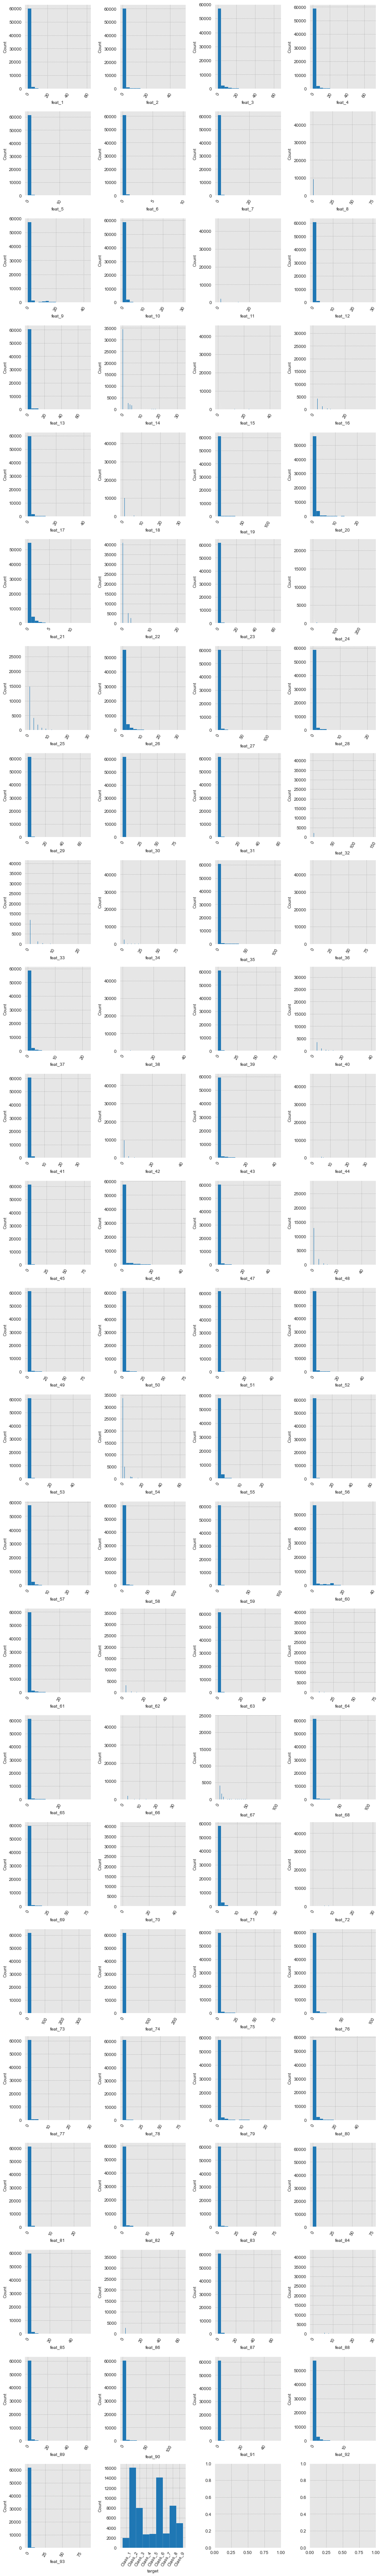

In [11]:
# Your code here
# setup
fig, axes = plt.subplots(ncols=4, nrows=24, figsize=(12, 80))
fig.set_tight_layout(True)
# plot
for index, col in enumerate(df.columns):
    ax = axes[index//4][index%4]
    sns.histplot(data=df[col], ax=ax, linewidth=0.1, alpha=1)
    ax.tick_params(axis='x', rotation=60)

Because there are so many zeroes, most values above zero will seem to be outliers. The safe decision for this data is to not delete any outliers and see what happens. With many 0s, sparse data is available and high values may be super informative. Moreover, without having any intuitive meaning for each of the features, we don't know if a value of ~260 is actually an outlier.

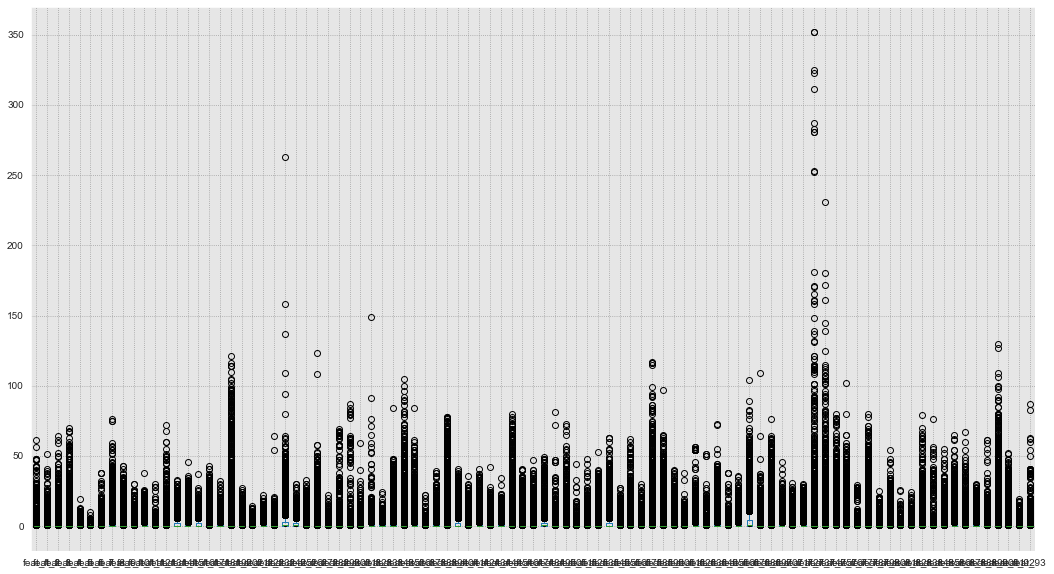

In [19]:
# Your code here
df.drop(target, axis=1).boxplot(figsize=(18,10));

## Feature engineering and selection with PCA

Have a look at the correlation structure of your features using a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

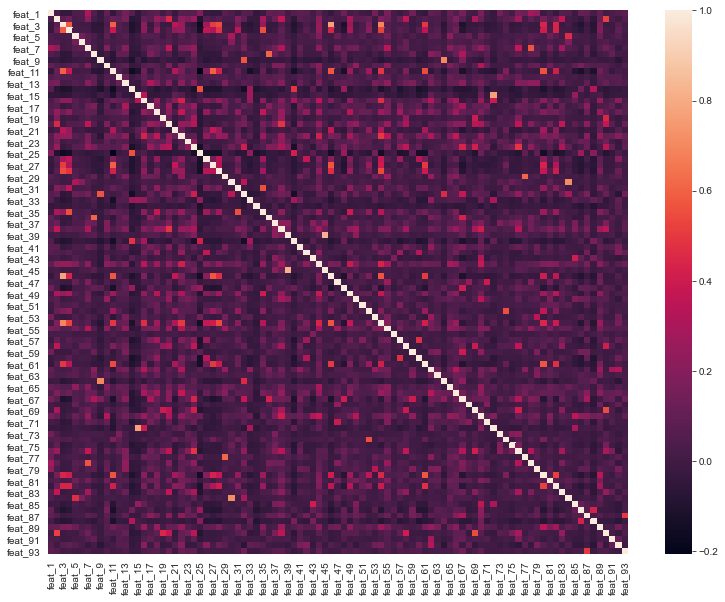

In [25]:
# Your code here
fig, ax = plt.subplots(figsize=(13,10)) 
sns.heatmap(df.corr(), ax=ax);

Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

In [38]:
# Your code here
from sklearn.decomposition import PCA
import numpy as np

pca_20 = PCA(n_components=20)
pca_30 = PCA(n_components=30)
pca_40 = PCA(n_components=40)

principleComponents_20 = pca_20.fit_transform(df.drop(target, axis=1))
principleComponents_30 = pca_30.fit_transform(df.drop(target, axis=1))
principleComponents_40 = pca_40.fit_transform(df.drop(target, axis=1))

print(np.sum(pca_20.explained_variance_ratio_))
print(np.sum(pca_30.explained_variance_ratio_))
print(np.sum(pca_40.explained_variance_ratio_))

0.7274657497083089
0.8242059507741857
0.8885564736466796


In [40]:
# 20 is not enough and 30 is too many
# will try 25 and 27

pca_25 = PCA(n_components=25)
pca_27 = PCA(n_components=27)

pc_25 = pca_25.fit_transform(df.drop(target, axis=1))
pc_27 = pca_27.fit_transform(df.drop(target, axis=1))

print(np.sum(pca_25.explained_variance_ratio_))
print(np.sum(pca_27.explained_variance_ratio_))

0.7826273294239092
0.8001552121515694


### Recheck the heatmap

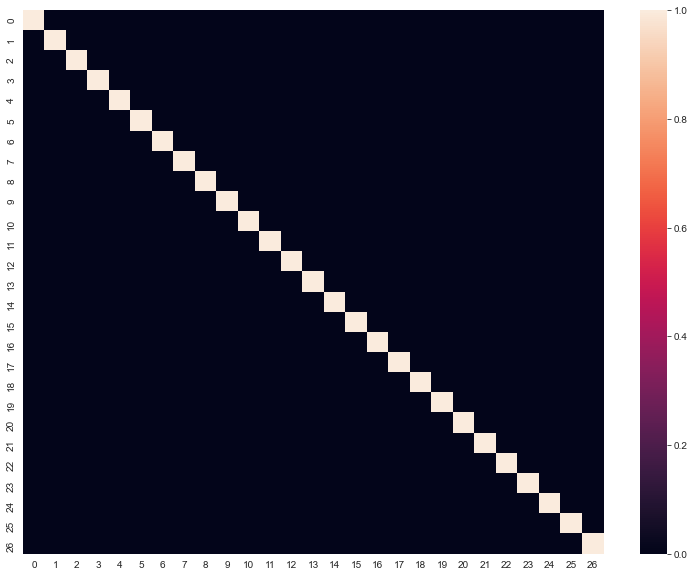

In [41]:
fig, ax = plt.subplots(figsize=(13,10)) 
sns.heatmap(pd.DataFrame(pc_27).corr(), ax=ax);

### NOTES: With 27 features I am able to keep 80% of explained variance.

## Create a train-test split with a test size of 40%

This is a relatively big training set, so you can assign 40% to the test set. Set the `random_state` to 42. 

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop(target, axis=1)
y = df[target]

In [44]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=42)

## Create a baseline model

Create your baseline model *in a pipeline setting*. In the pipeline: 

- Your first step will be to scale your features down to the number of features that ensure you keep just 80% of your explained variance (which we saw before)
- Your second step will be to build a basic logistic regression model 

Make sure to fit the model using the training set and test the result by obtaining the accuracy using the test set. Set the `random_state` to 123. 

In [45]:
# Your code here
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline

In [46]:
# Your code here
logreg_pipe = Pipeline([('pca', PCA(n_components=27, random_state=123)),
                        ('model', LogisticRegression(random_state=123))])

logreg_pipe.fit(X_train, y_train)

print(logreg_pipe.score(X_test, y_test))

0.7279411764705882


/Users/me/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# Your code here
###solution branch###
np.sum(logreg_pipe.predict(X_test) == y_test)/len(y_test)

0.7279411764705882

## Create a pipeline consisting of a linear SVM, a simple decision tree, and a simple random forest classifier

Repeat the above, but now create three different pipelines:
- One for a standard linear SVM
- One for a default decision tree
- One for a random forest classifier

In [49]:
# Your code here
# ⏰ This cell may take several minutes to run
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

svc = SVC(random_state=123)
d_tree = DecisionTreeClassifier(random_state=123)
forest = RandomForestClassifier(random_state=123)

models = [svc, d_tree, forest]
model_names = ["Support Vector Machine", "Decision Tree", "Random Forest"]

for i in range(len(models)):
    pipe = Pipeline([('pca', PCA(n_components=27, random_state=123)),
                     ('model', models[i])])
    pipe.fit(X_train, y_train)
    
    score = pipe.score(X_test, y_test)
    
    print(f'Classifier: {model_names[i]}\nTest Accuracy Score: {score}\n')
    



Classifier: Support Vector Machine
Test Accuracy Score: 0.7536360698125404
Classifier: Decision Tree
Test Accuracy Score: 0.671178086619263
Classifier: Random Forest
Test Accuracy Score: 0.7733516483516484


## Pipeline with grid search

Construct two pipelines with grid search:
- one for random forests - try to have around 40 different models
- one for the AdaBoost algorithm 

### Random Forest pipeline with grid search

In [51]:
# Your code here 
# imports
from sklearn.model_selection import GridSearchCV

In [73]:
def print_the_model(fit_model, base_model):
    kind_of_params = {}
    for k,v in fit_model.best_params_.items(): #<--.best_params_ dict
        key = k.split("__")[0]
        if key not in kind_of_params.keys():
            kind_of_params[key] = "" 
        if k.split("__")[1] == 'solver':
            kind_of_params[key] += k.split("__")[1]+"='"+str(v)+"', " # solver has qoutes around it
        elif k.split("__")[1] == 'criterion':
            kind_of_params[key] += k.split("__")[1]+"='"+str(v)+"', " # criterion has qoutes around it
        elif k.split("__")[1] == 'kernel':
            kind_of_params[key] += k.split("__")[1]+"='"+str(v)+"', " # kernal has qoutes around it
        elif k.split("__")[1] == 'class_weight':
            if str(v) == 'balanced':
                kind_of_params[key] += k.split("__")[1]+"='"+str(v)+"', " # class_weight='balanced' <-- qoutes
            else:
                kind_of_params[key] += k.split("__")[1]+"="+str(v)+", "        
        else: 
            kind_of_params[key] += k.split("__")[1]+"="+str(v)+", " #<-- notice comma
  
    # Remove extra comma at end of each dic value
    for k, v in kind_of_params.items():
        kind_of_params[k] = v[:-2]
    
    # Save in copy paste format:
    # Ex. DecisionTreeClassifier(criterion='gini', ..., paramN=value)
    if 'model' in  kind_of_params.keys():
        model_text = str(base_model).split(")")[0]+", "+kind_of_params['model']+")"
    
    print(model_text)

In [57]:
# Your code here
# ⏰ This cell may take a long time to run!
# Construct pipeline
pipe = Pipeline([('pca', PCA(n_components=27, random_state=123)), 
                 ('model', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'model__class_weight': [None, 'balanced'],
   'model__criterion': ['entropy', 'gini'], 
   'model__max_depth': [2, 5, 7],  
   'model__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'model__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_pipe = GridSearchCV(estimator=pipe, 
                       param_grid=param_grid_forest, 
                       scoring='accuracy', 
                       cv=3, 
                       verbose=2, 
                       return_train_score = True)

# Fit using grid search
fit_model = gs_pipe.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=0.05, model__min_samples_split=0.05; total time=   5.2s
[CV] END model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=0.05, model__min_samples_split=0.05; total time=   5.0s
[CV] END model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=0.05, model__min_samples_split=0.05; total time=   5.0s
[CV] END model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=0.05, model__min_samples_split=0.1; total time=   5.0s
[CV] END model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=0.05, model__min_samples_split=0.1; total time=   5.0s
[CV] END model__class_weight=None, model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=0.05, model__min_samples_spli

[CV] END model__class_weight=None, model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=0.2, model__min_samples_split=0.2; total time=   2.8s
[CV] END model__class_weight=None, model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=0.2, model__min_samples_split=0.2; total time=   2.8s
[CV] END model__class_weight=None, model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=0.2, model__min_samples_split=0.2; total time=   2.7s
[CV] END model__class_weight=None, model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=0.05, model__min_samples_split=0.05; total time=   8.5s
[CV] END model__class_weight=None, model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=0.05, model__min_samples_split=0.05; total time=   8.9s
[CV] END model__class_weight=None, model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=0.05, model__min_samples_split=0.05; total time=   8.6s
[CV] END model__class_weight=None, model

[CV] END model__class_weight=None, model__criterion=gini, model__max_depth=2, model__min_samples_leaf=0.2, model__min_samples_split=0.1; total time=   2.1s
[CV] END model__class_weight=None, model__criterion=gini, model__max_depth=2, model__min_samples_leaf=0.2, model__min_samples_split=0.1; total time=   2.1s
[CV] END model__class_weight=None, model__criterion=gini, model__max_depth=2, model__min_samples_leaf=0.2, model__min_samples_split=0.2; total time=   2.0s
[CV] END model__class_weight=None, model__criterion=gini, model__max_depth=2, model__min_samples_leaf=0.2, model__min_samples_split=0.2; total time=   2.1s
[CV] END model__class_weight=None, model__criterion=gini, model__max_depth=2, model__min_samples_leaf=0.2, model__min_samples_split=0.2; total time=   2.1s
[CV] END model__class_weight=None, model__criterion=gini, model__max_depth=5, model__min_samples_leaf=0.05, model__min_samples_split=0.05; total time=   4.2s
[CV] END model__class_weight=None, model__criterion=gini, mode

[CV] END model__class_weight=None, model__criterion=gini, model__max_depth=7, model__min_samples_leaf=0.2, model__min_samples_split=0.1; total time=   2.1s
[CV] END model__class_weight=None, model__criterion=gini, model__max_depth=7, model__min_samples_leaf=0.2, model__min_samples_split=0.1; total time=   2.1s
[CV] END model__class_weight=None, model__criterion=gini, model__max_depth=7, model__min_samples_leaf=0.2, model__min_samples_split=0.1; total time=   2.1s
[CV] END model__class_weight=None, model__criterion=gini, model__max_depth=7, model__min_samples_leaf=0.2, model__min_samples_split=0.2; total time=   2.1s
[CV] END model__class_weight=None, model__criterion=gini, model__max_depth=7, model__min_samples_leaf=0.2, model__min_samples_split=0.2; total time=   2.1s
[CV] END model__class_weight=None, model__criterion=gini, model__max_depth=7, model__min_samples_leaf=0.2, model__min_samples_split=0.2; total time=   2.1s
[CV] END model__class_weight=balanced, model__criterion=entropy,

[CV] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=0.2, model__min_samples_split=0.05; total time=   5.5s
[CV] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=0.2, model__min_samples_split=0.05; total time=   6.0s
[CV] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=0.2, model__min_samples_split=0.05; total time=   5.1s
[CV] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=0.2, model__min_samples_split=0.1; total time=   3.6s
[CV] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=0.2, model__min_samples_split=0.1; total time=   3.1s
[CV] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=0.2, model__min_samples_split=0.1; total time=   3.4s
[CV] END model__cla

[CV] END model__class_weight=balanced, model__criterion=gini, model__max_depth=2, model__min_samples_leaf=0.1, model__min_samples_split=0.2; total time=   2.8s
[CV] END model__class_weight=balanced, model__criterion=gini, model__max_depth=2, model__min_samples_leaf=0.1, model__min_samples_split=0.2; total time=   3.2s
[CV] END model__class_weight=balanced, model__criterion=gini, model__max_depth=2, model__min_samples_leaf=0.1, model__min_samples_split=0.2; total time=   3.1s
[CV] END model__class_weight=balanced, model__criterion=gini, model__max_depth=2, model__min_samples_leaf=0.2, model__min_samples_split=0.05; total time=   2.1s
[CV] END model__class_weight=balanced, model__criterion=gini, model__max_depth=2, model__min_samples_leaf=0.2, model__min_samples_split=0.05; total time=   2.1s
[CV] END model__class_weight=balanced, model__criterion=gini, model__max_depth=2, model__min_samples_leaf=0.2, model__min_samples_split=0.05; total time=   2.1s
[CV] END model__class_weight=balanced

[CV] END model__class_weight=balanced, model__criterion=gini, model__max_depth=7, model__min_samples_leaf=0.1, model__min_samples_split=0.1; total time=   3.4s
[CV] END model__class_weight=balanced, model__criterion=gini, model__max_depth=7, model__min_samples_leaf=0.1, model__min_samples_split=0.1; total time=   3.3s
[CV] END model__class_weight=balanced, model__criterion=gini, model__max_depth=7, model__min_samples_leaf=0.1, model__min_samples_split=0.1; total time=   3.4s
[CV] END model__class_weight=balanced, model__criterion=gini, model__max_depth=7, model__min_samples_leaf=0.1, model__min_samples_split=0.2; total time=   3.6s
[CV] END model__class_weight=balanced, model__criterion=gini, model__max_depth=7, model__min_samples_leaf=0.1, model__min_samples_split=0.2; total time=   3.4s
[CV] END model__class_weight=balanced, model__criterion=gini, model__max_depth=7, model__min_samples_leaf=0.1, model__min_samples_split=0.2; total time=   3.4s
[CV] END model__class_weight=balanced, m

NameError: name 'model' is not defined

In [60]:
print_the_model(fit_model, RandomForestClassifier(random_state = 123))

fit_model.score(X_test, y_test)

RandomForestClassifier(random_state=123, class_weight=None, criterion='entropy', max_depth=7, min_samples_leaf=0.05, min_samples_split=0.05)


0.6281108597285068

Use your grid search object along with `.cv_results` to get the full result overview

In [61]:
# Your code here 
fit_model.cv_results_

{'mean_fit_time': array([4.9189384 , 5.09474834, 5.99872732, 4.62871178, 4.36374482,
        4.49643866, 2.78913204, 2.55396454, 2.79116742, 8.18289471,
        8.09195137, 6.37125961, 5.01214361, 4.71173429, 5.4906532 ,
        2.58153272, 2.6166331 , 2.63740476, 8.48283267, 7.89114563,
        6.51707117, 4.6804111 , 4.74516837, 4.76252929, 2.60956502,
        2.46049102, 2.43814166, 2.56991172, 2.56990862, 2.4829495 ,
        2.38867172, 2.34094866, 2.3686684 , 1.92102853, 1.94141873,
        1.93282763, 3.98104699, 3.98307689, 3.36979198, 2.911436  ,
        2.91238427, 2.89727092, 1.92737762, 1.92508896, 1.91804202,
        4.76134062, 5.13389047, 3.49930747, 2.92086935, 2.980805  ,
        2.93805854, 1.93834925, 1.96171522, 1.94108089, 4.92977071,
        4.92332665, 4.85649133, 4.0537227 , 4.18272996, 4.09913532,
        2.40383498, 2.73598107, 2.8614885 , 8.94717805, 8.36279432,
        7.51346699, 5.49044069, 5.75933027, 5.7829899 , 5.17858028,
        3.16396896, 2.70193132,

### AdaBoost

In [62]:
# Your code here
# ⏰ This cell may take several minutes to run
from sklearn.ensemble import AdaBoostClassifier

In [65]:
# Construct pipeline
pipe = Pipeline([('pca', PCA(n_components=27, random_state=123)), 
                 ('model', AdaBoostClassifier(random_state = 123))])

# Set grid search params
param_grid_ada = [ 
  {'model__n_estimators': [50, 100],
   'model__learning_rate': [1.0, 0.5, 0.1]
  }
]

# Construct grid search
gs_pipe = GridSearchCV(estimator=pipe, 
                       param_grid=param_grid_ada, 
                       scoring='accuracy', 
                       cv=3, 
                       verbose=2, 
                       return_train_score = True)

# Fit using grid search
fit_model = gs_pipe.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...model__learning_rate=1.0, model__n_estimators=50; total time=   8.7s
[CV] END ...model__learning_rate=1.0, model__n_estimators=50; total time=   7.7s
[CV] END ...model__learning_rate=1.0, model__n_estimators=50; total time=  10.7s
[CV] END ..model__learning_rate=1.0, model__n_estimators=100; total time=  17.6s
[CV] END ..model__learning_rate=1.0, model__n_estimators=100; total time=  16.9s
[CV] END ..model__learning_rate=1.0, model__n_estimators=100; total time=  18.1s
[CV] END ...model__learning_rate=0.5, model__n_estimators=50; total time=   7.4s
[CV] END ...model__learning_rate=0.5, model__n_estimators=50; total time=   8.3s
[CV] END ...model__learning_rate=0.5, model__n_estimators=50; total time=   7.1s
[CV] END ..model__learning_rate=0.5, model__n_estimators=100; total time=  16.2s
[CV] END ..model__learning_rate=0.5, model__n_estimators=100; total time=  13.6s
[CV] END ..model__learning_rate=0.5, model__n_est

In [66]:
print_the_model(fit_model, AdaBoostClassifier(random_state = 123))

print(f'Test Score: {fit_model.score(X_test, y_test)}')

print(f'Train Score: {fit_model.score(X_train, y_train)}')

AdaBoostClassifier(random_state=123, learning_rate=0.5, n_estimators=50)
Test Score: 0.6708548804137039
Train Score: 0.6699617518720035


Use your grid search object along with `.cv_results` to get the full result overview: 

In [67]:
# Your code here 
fit_model.cv_results_

{'mean_fit_time': array([ 8.74180539, 17.03017966,  7.4103349 , 14.12072062,  6.88238684,
        15.99855836]),
 'std_fit_time': array([1.14441126, 0.62072486, 0.53031985, 1.24339406, 0.14447192,
        0.26280851]),
 'mean_score_time': array([0.27262505, 0.51053135, 0.19683933, 0.34492207, 0.23729428,
        0.39109198]),
 'std_score_time': array([0.09417149, 0.1484415 , 0.00459577, 0.00164435, 0.06310845,
        0.0301351 ]),
 'param_model__learning_rate': masked_array(data=[1.0, 1.0, 0.5, 0.5, 0.1, 0.1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__n_estimators': masked_array(data=[50, 100, 50, 100, 50, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__learning_rate': 1.0, 'model__n_estimators': 50},
  {'model__learning_rate': 1.0, 'model__n_estimators': 100},
  {'model__learning_rate': 0.5, 'model__n_est

### Level-up (Optional): SVM pipeline with grid search 

As extra level-up work, construct a pipeline with grid search for support vector machines. 
* Make sure your grid isn't too big. You'll see it takes quite a while to fit SVMs with non-linear kernel functions!

In [70]:
# Your code here
# ⏰ This cell may take a very long time to run!
# Construct pipeline
pipe = Pipeline([('pca', PCA(n_components=27, random_state=123)), 
                 ('model', SVC(random_state=123))])

# Set grid search params
param_grid_svm = [
  {'model__C': [0.1, 1, 10] , 'model__kernel': ['linear']},
  {'model__C': [1, 10], 'model__gamma': [0.001, 0.01], 'model__kernel': ['rbf']},
 ]

"""
From TC chat, the reason two dictionaries here, even though they both have C values of 1 and 10, 
It will allow you to kind of avoid some combinations that you may not want.
If you pass one dictionary, you make be forced to have all iterations in it. 
But with 2 (or more dictionaries) you could specify only the parameters you actually want to run.
It will treat each dictionary in the list as separate, not combine across.
It will still only return on set best params.
"""

# Construct grid search
gs_pipe = GridSearchCV(estimator=pipe, 
                      param_grid=param_grid_svm, 
                      scoring='accuracy', 
                      cv=3, 
                      verbose=2, 
                      return_train_score = True)

# Fit using grid search
fit_model = gs_pipe.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END .................model__C=0.1, model__kernel=linear; total time=  37.1s
[CV] END .................model__C=0.1, model__kernel=linear; total time=  36.0s
[CV] END .................model__C=0.1, model__kernel=linear; total time=  35.9s
[CV] END ...................model__C=1, model__kernel=linear; total time= 1.4min
[CV] END ...................model__C=1, model__kernel=linear; total time= 2.4min
[CV] END ...................model__C=1, model__kernel=linear; total time= 1.3min
[CV] END ..................model__C=10, model__kernel=linear; total time= 7.7min
[CV] END ..................model__C=10, model__kernel=linear; total time=12.8min
[CV] END ..................model__C=10, model__kernel=linear; total time= 7.8min
[CV] END ..model__C=1, model__gamma=0.001, model__kernel=rbf; total time=  42.6s
[CV] END ..model__C=1, model__gamma=0.001, model__kernel=rbf; total time=  43.2s
[CV] END ..model__C=1, model__gamma=0.001, model_

In [74]:
print_the_model(fit_model, SVC(random_state=123))

print(f'Test Score: {fit_model.score(X_test, y_test)}')

print(f'Train Score: {fit_model.score(X_train, y_train)}')

SVC(random_state=123, C=10, gamma=0.01, kernel='rbf')
Test Score: 0.7785229476405947
Train Score: 0.8513171362387545


In [72]:
### From solution branch, this is how they print out .score and best params

# Best accuracy
print('Best accuracy: %.3f' % gs_pipe.best_score_)

# Best params
print('\nBest params:\n', gs_pipe.best_params_)

Best accuracy: 0.768

Best params:
 {'model__C': 10, 'model__gamma': 0.01, 'model__kernel': 'rbf'}


### Confirming that the reason the scores are different is because .best_score_ is the mean of the three cross validation sets

In [75]:
# Your code here 
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(random_state=123, C=10, gamma=0.01, kernel='rbf'), X_train, y_train, cv=3)

array([0.78240142, 0.77810101, 0.78189899])

Use your grid search object along with `.cv_results` to get the full result overview: 

In [77]:
fit_model.cv_results_

{'mean_fit_time': array([ 28.35727708,  94.22111336, 559.55154562,  21.73381424,
         27.47226024,  18.72184761,  28.91101774]),
 'std_fit_time': array([  0.360242  ,  28.40151836, 142.35077221,   0.32780275,
          0.20555276,   0.2533694 ,   1.70538362]),
 'mean_score_time': array([ 7.97525803,  7.63354762,  7.14030671, 21.37164267, 22.98079443,
        19.81480885, 23.23835071]),
 'std_score_time': array([0.87907456, 0.58338715, 0.37322711, 0.02519169, 0.09021591,
        0.11034042, 0.88266692]),
 'param_model__C': masked_array(data=[0.1, 1, 10, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__kernel': masked_array(data=['linear', 'linear', 'linear', 'rbf', 'rbf', 'rbf',
                    'rbf'],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__gamma': masked_array(data=[--, --, --, 0.

## Note

Note that this solution is only one of many options. The results in the Random Forest and AdaBoost models show that there is a lot of improvement possible by tuning the hyperparameters further, so make sure to explore this yourself!

## Summary 

Great! You've gotten a lot of practice in using PCA in pipelines. What algorithm would you choose and why?